In [2]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def initial_state_generator(N, initial_filing):
    state = np.zeros((N), dtype=np.int8)
    pos_arr = list(range(N))
    initial_filing_no = int(N * initial_filing)

    rn.shuffle(pos_arr)
    # print(pos_arr)

    for i in range(initial_filing_no):
        j = pos_arr.pop(0)
        state[j] = 1

    return state

Thermalization Complete!
Overall Average Particle Density: 0.6240848000000002


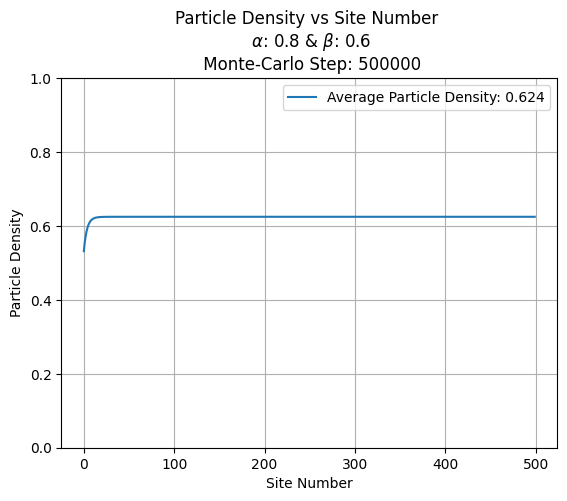

In [66]:
N = 500
alpha = 0.8
beta = 0.6
initial_filing = 0.1
mc_step_no = 5 * 10**5
therm_step_no = int(mc_step_no * 0.05)

initial_state = initial_state_generator(N, initial_filing)
state = initial_state.copy()

av_den_arr = np.zeros((mc_step_no))
state_sum_arr = np.zeros((N))

# print(state)
# print(initial_state)

for i in range(therm_step_no):
    new_state = state.copy()
    for j in range(N):
        if j == 0:
            if state[j] == 0:
                r = rn.random()
                if r < alpha:
                    new_state[j] = 1
            elif state[j] == 1 and state[j + 1] == 0:
                new_state[j] = 0
                new_state[j + 1] = 1
        elif j == N - 1 and state[j] == 1:
            r = rn.random()
            if r < beta:
                new_state[j] = 0
            else:
                new_state[j] = 1
        elif state[j] == 1 and state[j + 1] == 0:
            new_state[j] = 0
            new_state[j + 1] = 1
    state = new_state.copy()

    # print(f"{i + 1} ---- {state} ---- {state.mean()}")

print("Thermalization Complete!")


for i in range(mc_step_no):
    new_state = state.copy()
    for j in range(N):
        if j == 0:
            if state[j] == 0:
                r = rn.random()
                if r < alpha:
                    new_state[j] = 1
            elif state[j] == 1 and state[j + 1] == 0:
                new_state[j] = 0
                new_state[j + 1] = 1
        elif j == N - 1 and state[j] == 1:
            r = rn.random()
            if r < beta:
                new_state[j] = 0
            else:
                new_state[j] = 1
        elif state[j] == 1 and state[j + 1] == 0:
            new_state[j] = 0
            new_state[j + 1] = 1
    state = new_state.copy()
    av_den_arr[i] = state.mean()
    state_sum_arr += state
    # print(f"{i + 1} ---- {state} ---- {state.mean()}")

print(f"Overall Average Particle Density: {av_den_arr.mean()}")

pos_arr = np.arange(N)
site_part_den_arr = state_sum_arr / mc_step_no

plt.plot(pos_arr, site_part_den_arr, label=f"Average Particle Density: {np.around(av_den_arr.mean(), decimals=3)}")
# plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f"Particle Density vs Site Number \n $\\alpha$: {alpha} & $\\beta$: {beta} \n Monte-Carlo Step: {mc_step_no}")
plt.xlabel("Site Number")
plt.ylabel("Particle Density")
plt.legend()
plt.grid()
plt.show()
